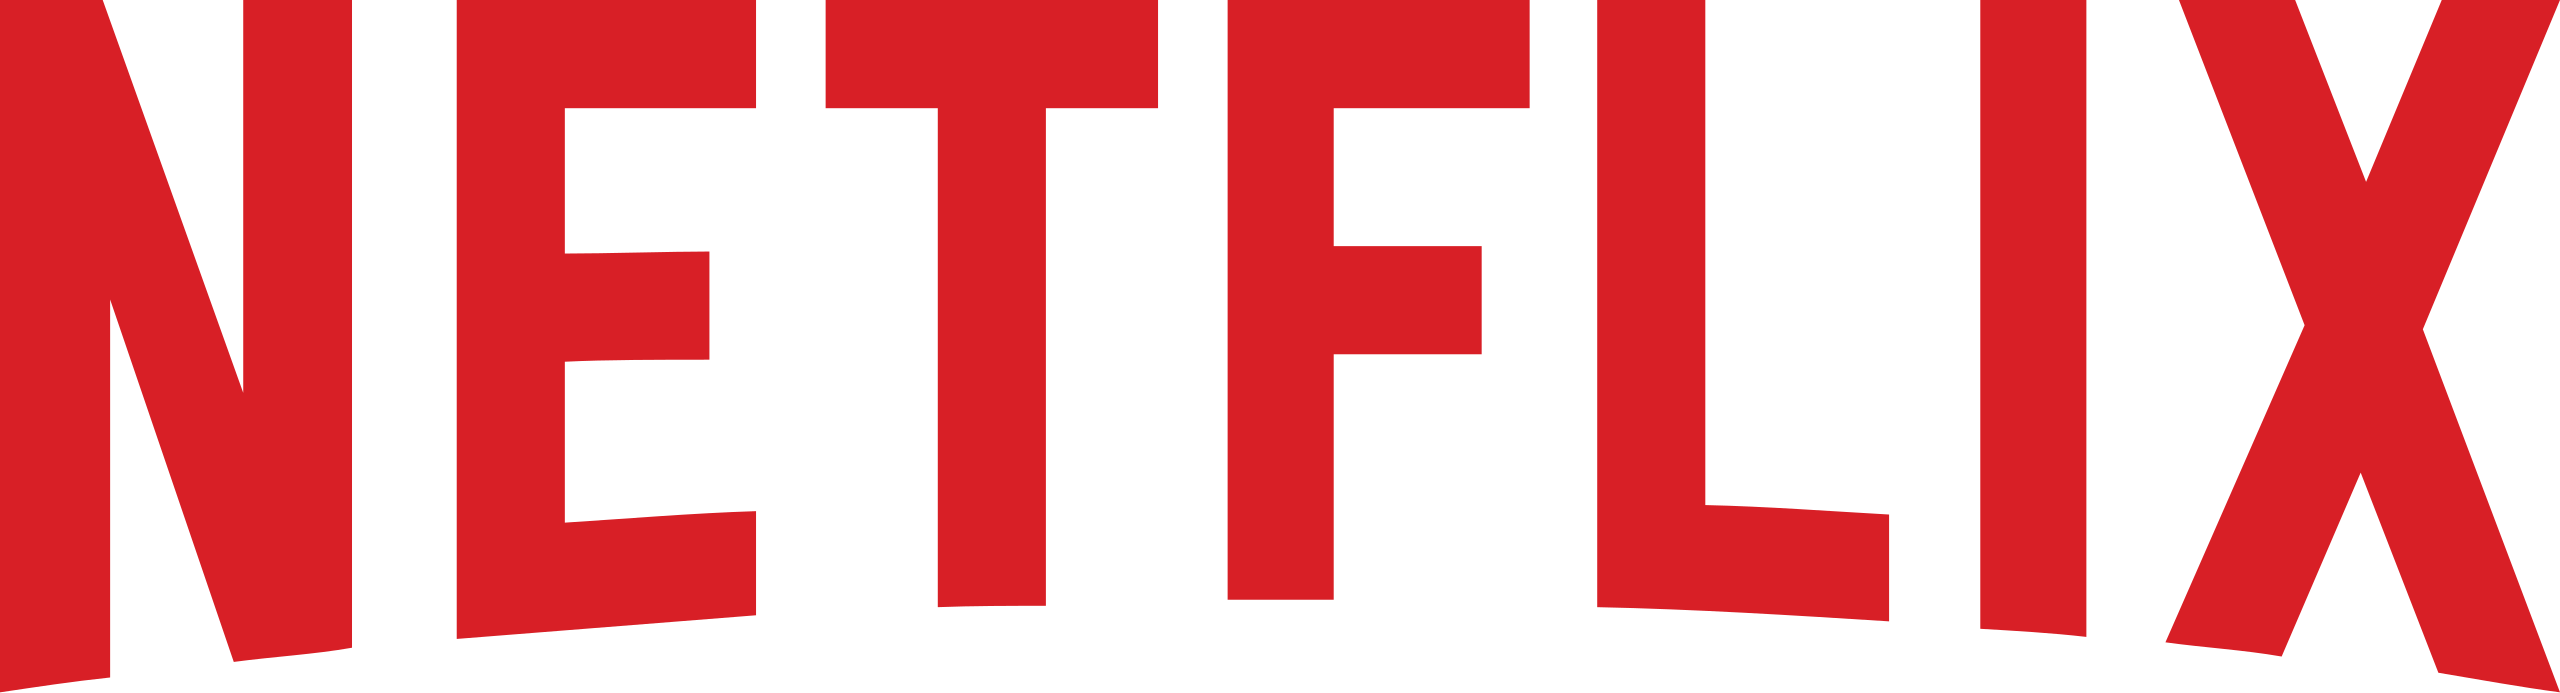

# <center><span style="color:red"> ✨🎊 제 1차 해커톤 : 데이터 축제 🎊✨ </span></center>
<center>팀원 : 유원상, 김다혜, 권정현 👫👫</center>

# <center>< Netflix Movies and TV Shows ></center>

---

## [목차] 

### 1. 데이터 탐색 

### 2. 데이터 전처리 

### 3. 데이터 분석 및 시각화 with 가설 

---

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/[hackathon]/netflix_titles.csv'

data = pd.read_csv(data_dir)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


---
---

## 1. 데이터 탐색

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### `column 확인`
1. show_id : id
2. type : tv or movie
3. title  : 제목       
4. director : 제작자     
5. cast : 출연자         
6. country : 제작국가      
7. date_added : netflix에 공개된 날짜   
8. release_year : 출시연도  
9. rating : 관람 등급       
10. duration : 작품 길이     
11. listed_in : 작품 분류   
12. description : 작품 개요

### 유일한 값 확인

In [4]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### 결측치 확인

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
import missingno as msno

<AxesSubplot:>

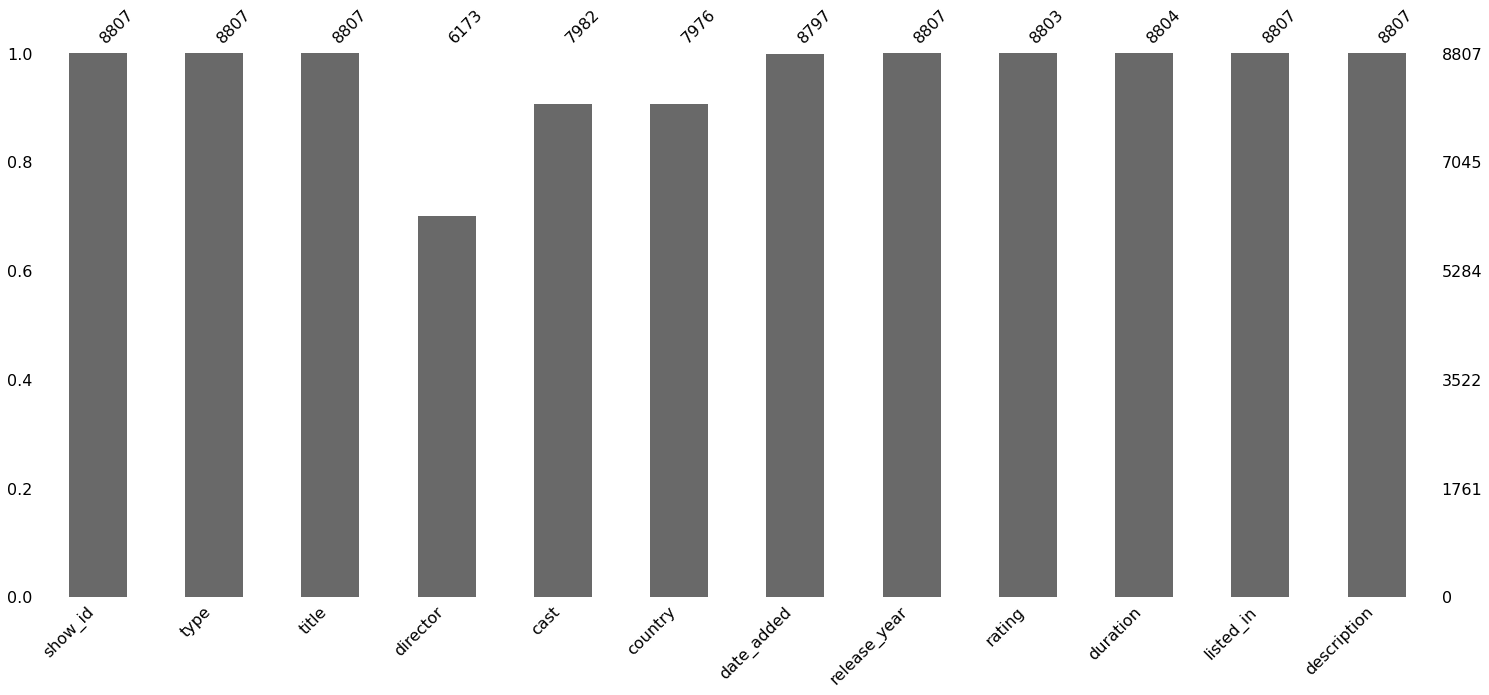

In [7]:
msno.bar(data)

###  `결측치`
- director에 2634개, cast에 825개, country에 831개의 많은 결측치가 확인되었다
- date_added에 10개, rating에 4개, duration에 3개의 결측치가 확인되었다

---
---

## 2. 데이터 전처리

### (1) 사용하지 않는 컬럼 삭제
- director와 cast는 결측치도 많고 사용하지 않기 때문에 해당 컬럼을 제거한다

In [8]:
data = data.drop(['director', 'cast'], axis=1)
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### (2) 결측치 처리
- country가 null인 행은 제거해준다

In [9]:
data = data.dropna(subset=['country'])
data.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      9
release_year    0
rating          3
duration        3
listed_in       0
description     0
dtype: int64

### (3) 나머지 null값을 가지는 데이터 확인

#### <span style="color: #0000FF">data_added 확인</span>

In [10]:
data[data['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [11]:
# date_added가 NaN 행은 제거
data = data.dropna(subset=['date_added'])

# 확인
data[data['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


#### <span style="color: #0000FF">duration 확인</span>

In [12]:
data[data['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


> duration의 null인 데이터를 확인해보니 rating값과 duration값이 바뀌어 있는걸 확인했다 <br>
> 두 데이터값을 바꿔주는 작업을 한다

In [13]:
index=data.index[data['duration'].isna()]
for i in index:
    data['duration'][i]=data['rating'][i]
    data['rating'][i]= np.NaN

data[data['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


> duration에 더이상 null값이 존재하지 않는다


#### <span style="color: #0000FF">rating 컬럼 확인</span>

In [14]:
data[data['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
p_r=['NC-17','NC-17','NC-17','TV-14','TV-MA','PG-13']
r_index=data.index[data['rating'].isna()]
for i in range(len(r_index)):
    data['rating'][r_index[i]]=p_r[i]
    
data[data['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


> rating, 즉 관람등급이 없는 데이터는 직접 등급을 찾아서 추가해주었다

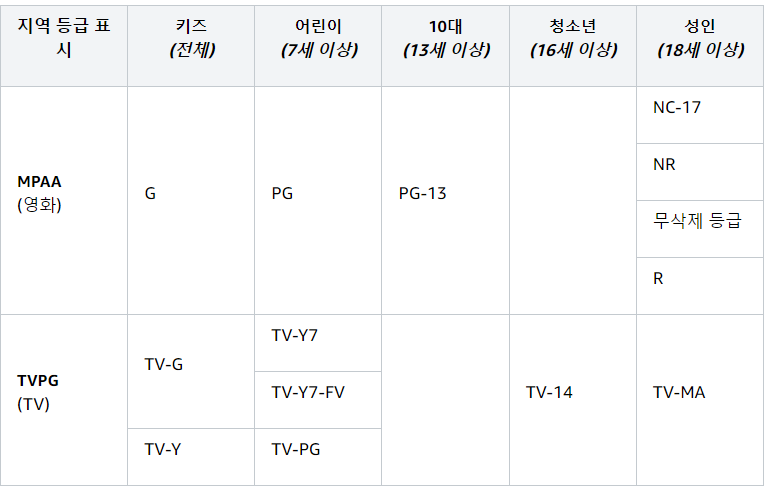

출처 : https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=ko_KR&nodeId=GFGQU3WYEG6FSJFJ

In [16]:
ratings_ages = { 'TV-PG': 'child',
                'TV-MA': 'Adults', 
                'TV-Y7-FV': 'child', 
                'TV-Y7': 'child', 
                'TV-14': 'Teenager', 
                'R': 'Adults', 
                'TV-Y': 'Kids', 
                'NR': 'Adults', 
                'PG-13': 'Teenager',
                'TV-G': 'Kids', 
                'PG': 'child', 
                'G': 'Kids', 
                'UR': 'Adults', 
                'NC-17': 'Adults' }

data['target_ages'] = data['rating'].replace(ratings_ages)
# 확인하기
data['target_ages'].unique()
data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teenager
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teenager
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Adults
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",child


### (4) data_added 컬럼 분리

In [17]:
# data_added 앞에 공백제거
data["date_added"] = data["date_added"].str.strip()

data['year_added'] = data["date_added"].apply(lambda x : str(x).split(",")[-1])
data['month_added'] = data["date_added"].apply(lambda x : str(x).split(" ")[0])

In [18]:
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teenager,2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,2021,September
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,2021,September
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teenager,2021,September


In [19]:
# 확인
data["month_added"].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October'],
      dtype=object)

In [20]:
# 확인
data["year_added"].unique()

array([' 2021', ' 2020', ' 2019', ' 2018', ' 2017', ' 2016', ' 2015',
       ' 2014', ' 2013', ' 2012', ' 2011', ' 2009', ' 2008', ' 2010'],
      dtype=object)

In [21]:
# 년도앞에 공백 제거
data["year_added"] = data["year_added"].str.strip()

In [22]:
# 확인
data["year_added"].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

### (5) 최종 데이터

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7967 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7967 non-null   object
 1   type          7967 non-null   object
 2   title         7967 non-null   object
 3   country       7967 non-null   object
 4   date_added    7967 non-null   object
 5   release_year  7967 non-null   int64 
 6   rating        7967 non-null   object
 7   duration      7967 non-null   object
 8   listed_in     7967 non-null   object
 9   description   7967 non-null   object
 10  target_ages   7967 non-null   object
 11  year_added    7967 non-null   object
 12  month_added   7967 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


---
---

## 3. 분석 뿌셔뿌셔👊👊

### 1. 데이터 분포가 어떨까?

### 1-1. <span style='background-color: #fff5b1'>컨텐츠 분포</span>

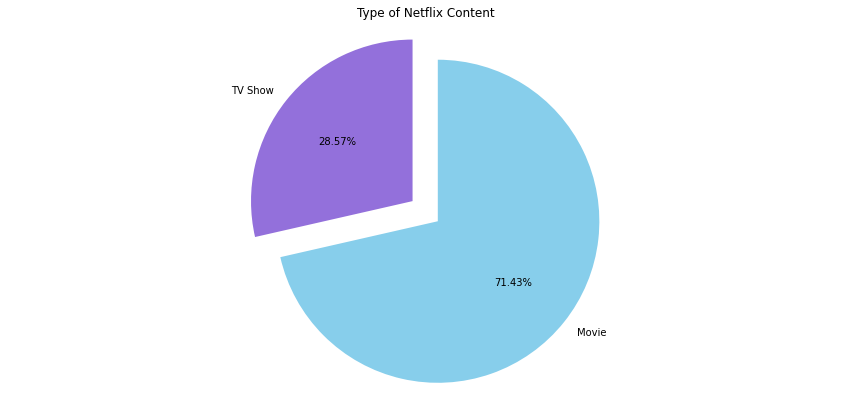

In [24]:
plt.figure(figsize=(15, 7))
labels=['TV Show', 'Movie'] 
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1], 
        autopct='%1.2f%%',colors=['mediumpurple','skyblue'], startangle=90) 
plt.title('Type of Netflix Content') 
plt.axis('equal') 
plt.show()

### 1-2. <span style='background-color: #fff5b1'>나라별 등록 작품 수</span>

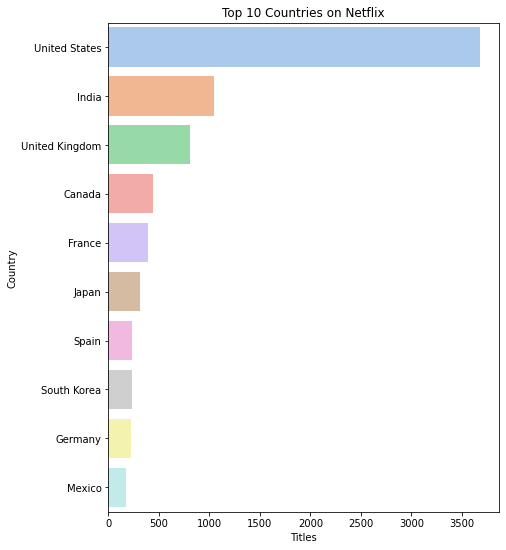

In [25]:
filtered_countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10], palette="pastel")
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

### 1-3. <span style='background-color: #fff5b1'>장르 수</span>

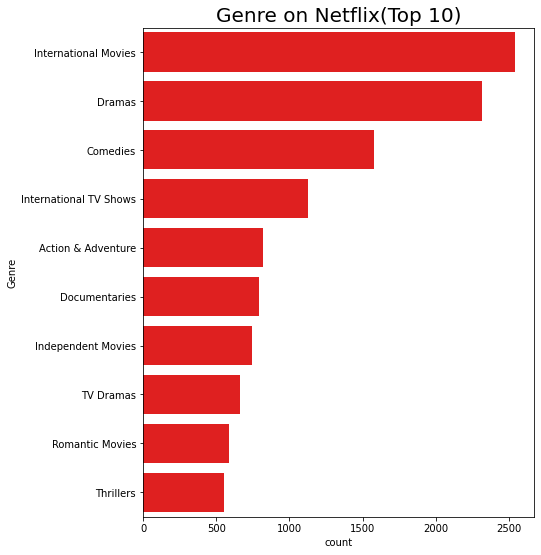

In [26]:
filtered_countries = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(7,9))

g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10],color='r')
plt.title('Genre on Netflix(Top 10)',fontsize=20)
plt.ylabel('Genre')
#plt.show()
plt.savefig('7.Genre on Netflix(Top 10).png')

### 1-3-1. <span style='background-color: #fff5b1'>Movie 장르 수</span> 

In [27]:
movie = data.loc[data['type'] == 'Movie']
tv=data.loc[data['type'] == 'TV Show']

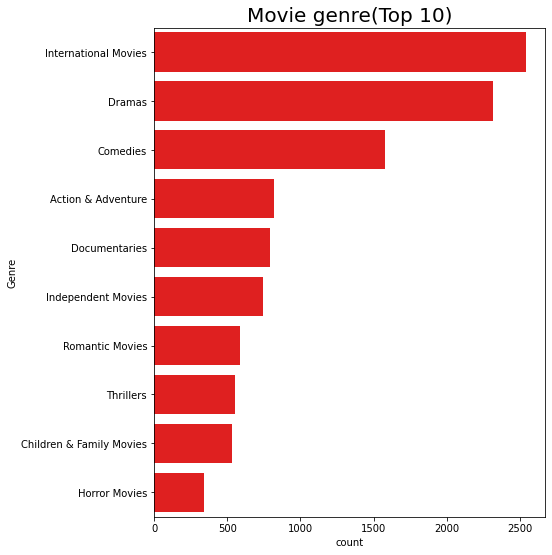

<Figure size 432x288 with 0 Axes>

In [28]:
l_movie = movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))

g = sns.countplot(y = l_movie, order=l_movie.value_counts().index[:10],color='r')
plt.title('Movie genre(Top 10)',fontsize=20)
plt.ylabel('Genre')
plt.show()
plt.savefig('8.Movie genre(Top 10).png')

### 1-3-2.  <span style='background-color: #fff5b1'>TV Show 장르 수</span>  

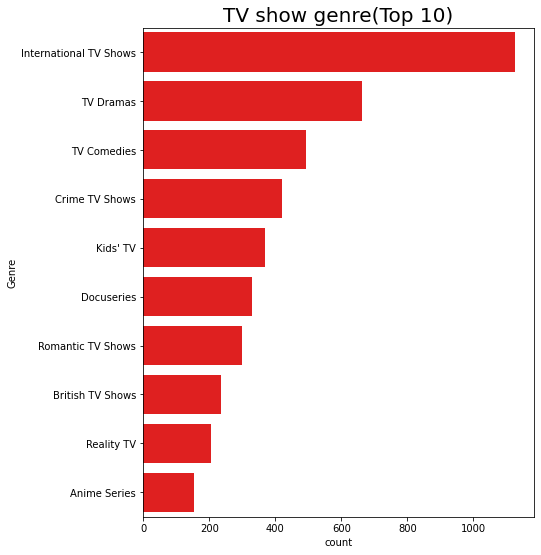

In [29]:
l_tv = tv.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))

g = sns.countplot(y = l_tv, order=l_tv.value_counts().index[:10],color='r')
plt.title('TV show genre(Top 10)',fontsize=20)
plt.ylabel('Genre')
#plt.show()
plt.savefig('9.TV show genre(Top 10).png')

### 1-4.  <span style='background-color: #fff5b1'>관람 등급별 작품 수</span> 
    

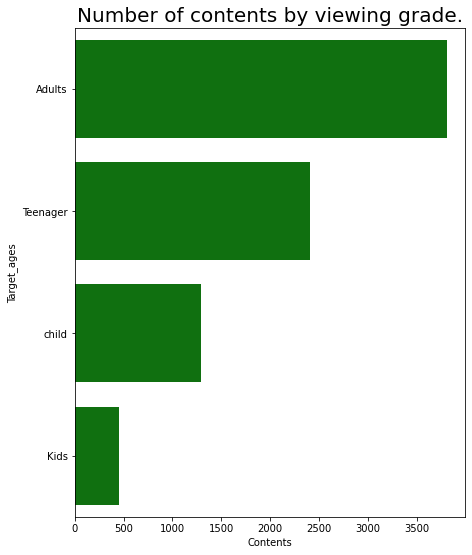

In [31]:
c = data.set_index('release_year').target_ages.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = ages, order=c.value_counts().index[:4],color='green')
plt.title('Number of contents by viewing grade.',fontsize=20)
plt.xlabel('Contents')
plt.ylabel('Target_ages')
#plt.show()
plt.savefig('10.Number of contents by viewing grade.png')

### 1-5. <span style='background-color: #fff5b1'>작품 길이 분포</span>  

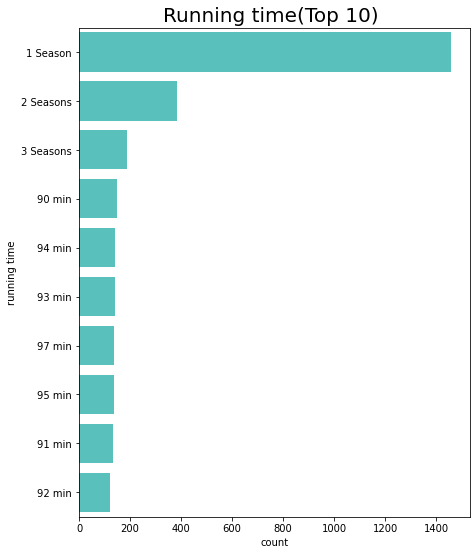

In [32]:
filtered_countries = data.set_index('title').duration.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10],color='mediumturquoise')
plt.title('Running time(Top 10) ',fontsize=20)
plt.ylabel('running time')
#plt.show()
plt.savefig('11.Running time(Top 10).png')

## <span style='background-color: #ffdce0'>정리</span>
1. 넷플릭스에 등록된 작품의 타입 분포는?
    - Movie가 전체 7967개 중 약 71%를 차지하고 TV Show는 약 29%를 차지한다.
    
    
2. 어느 나라가 가장 많이 제작했을까?
    - 미국 작품이 약 3500개로 넷플릭스에 가장 많이 등록되어 있다. 우리나라는 8번째로 넷플릭에 등록된 작품이 많은 국가이다.
    
    
3. 장르의 분포는?
    - 장르 전체로 보면 International Movies가 가장 많다. 그 다음이 Dramas이다.
    
    
4. Movie 장르의 분포는?
    - Movie장르도 또한 International Movies가 가장 많다. 그 다음이 Dramas이다.
    
    
5. TV Show 장르의 분포는?
    - TV Show 장르에서는 International TV Show가 가장 많고 그다음이 TV Dramas이다.
    
    
6. 관람 등급은 어떤 것이 가장 많을까?
    - 미국 기준 관람 등급에는 Adults 등급의 작품이 많이 차지하고 있다.
    
    
7. 작품 시간의 분포는 어떠한가?
    - 작품 시간은 그래프를 보면 TV Show는 거의 시즌1까지 있고, Movie는 거의 1시간 30분 정도인 것을 알 수 있다.

---

## 2.  <span style='background-color: #f5f0ff'>가설1</span>
- 어떤 것이 자주 노출이 될수록 그 어떤거에 대한 호감도와 관심은 올라간다
- 그래서 노출이 활발할수록, 즉 마케팅 비용이 늘어나면 구독자가 증가할 것이다.
- 늘어난 구독자를 잡기 위해 더 많은 컨텐츠가 제공될 것이다.
- 따라서 마케팅 비용이 증가하면 더 많은 컨텐츠가 제공될 것으로 예상한다 

In [33]:
# 단위 만명
Netflix_subscribers = { '2011': '216',
                        '2012': '303', 
                        '2013': '414', 
                        '2014': '544', 
                        '2015': '708', 
                        '2016': '890', 
                        '2017': '1106', 
                        '2018': '1392', 
                        '2019': '1670',
                        '2020': '1929',
                        '2021': '2136',                        
                        '2008': np.nan,
                        '2009': np.nan,
                        '2010': np.nan}

data['Subscribers'] = data['year_added'].replace(Netflix_subscribers)
# 확인하기
data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added,Subscribers
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teenager,2021,September,2136
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,2021,September,2136
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,2021,September,2136
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,2021,September,2136
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teenager,2021,September,2136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Adults,2016,March,890
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Adults,2019,November,1670
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Adults,2019,November,1670
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",child,2020,January,1929


In [34]:
# 단위 밀리언
Marketing_Expenses = {  '2011': '380',
                        '2012': '354', 
                        '2013': '469', 
                        '2014': '606', 
                        '2015': '823', 
                        '2016': '1096', 
                        '2017': '1435', 
                        '2018': '2369', 
                        '2019': '2650',
                        '2020': '2230',
                        '2021': '2550',
                        '2008': np.nan,
                        '2009': np.nan,
                        '2010': np.nan}

data['Marketing'] = data['year_added'].replace(Marketing_Expenses)

# 확인하기
data['Marketing'] .unique()

array(['2550', '2230', '2650', '2369', '1435', '1096', '823', '606',
       '469', '354', '380', nan], dtype=object)

In [35]:
subscribers=data.set_index('year_added').Subscribers.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
marketing=data.set_index('year_added').Marketing.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
# 중복데이터 제거하기 https://mizykk.tistory.com/93
subscribers=subscribers.drop_duplicates().sort_index()
marketing=marketing.drop_duplicates().sort_index()

# 0인데이터 제거
subscribers.notnull()
marketing.notnull()

year_added
2011    True
2012    True
2013    True
2014    True
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
2021    True
dtype: bool

In [36]:
print(subscribers)
marketing

year_added
2011     216
2012     303
2013     414
2014     544
2015     708
2016     890
2017    1106
2018    1392
2019    1670
2020    1929
2021    2136
dtype: object


year_added
2011     380
2012     354
2013     469
2014     606
2015     823
2016    1096
2017    1435
2018    2369
2019    2650
2020    2230
2021    2550
dtype: object

### 2-1. <span style='background-color: #fff5b1'>마케팅 비용과 구독자수 관계</span>

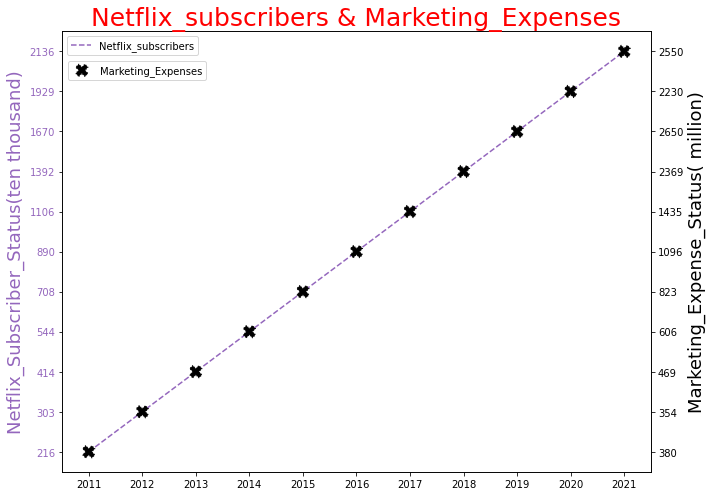

In [37]:
# 구독자수와 마케팅 비용의 상관 관계 
fig, ax1 = plt.subplots(figsize=(10,7)) 
ax1.set_ylabel('Netflix_Subscriber_Status(ten thousand)', fontsize=18, color='C4')
ax1.plot(subscribers.index, subscribers.values, linestyle='--', color='C4',label='Netflix_subscribers') 
ax1.tick_params(axis='y',labelcolor='C4')
ax1.legend(loc=0)


ax2=ax1.twinx()
ax2.set_ylabel('Marketing_Expense_Status( million)', fontsize=18, color='k')
ax2.scatter(marketing.index, marketing.values, marker='X',linestyle=':', color='k',label='Marketing_Expenses',s=150) 
ax2.tick_params(axis='y',labelcolor='k')
ax2.legend(loc=(0.01,0.89))
ax2.set_title('Netflix_subscribers & Marketing_Expenses', fontsize=25 ,color='r',) 
fig.tight_layout()
#plt.show()
plt.savefig('4.Netflix_subscribers & Marketing_Expenses.png')

### 2-2. <span style='background-color: #fff5b1'>구독자 수와 컨텐츠 개수 관계</span> 

In [38]:
Add_year = data.set_index('release_year').year_added.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
Add_year = Add_year.value_counts().sort_index().drop(index=['2008','2009','2010'])

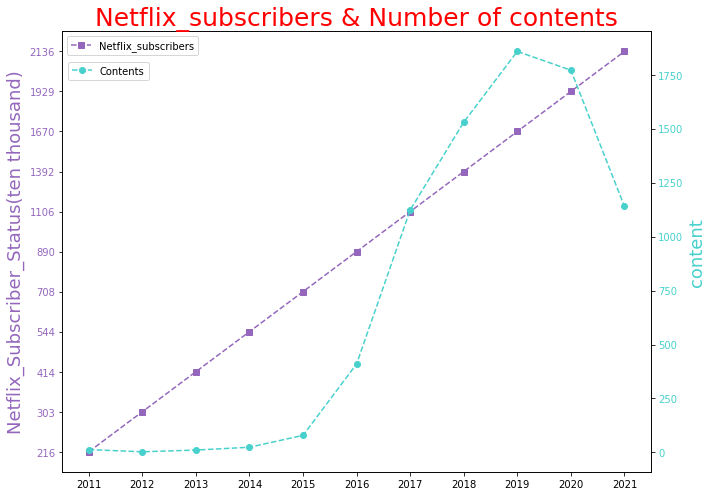

In [39]:
# 구독자수와 컨텐츠 개수의 상관 관계 
fig, ax1 = plt.subplots(figsize=(10,7)) 
ax1.set_ylabel('Netflix_Subscriber_Status(ten thousand)', fontsize=18, color='C4')
ax1.plot(subscribers.index, subscribers.values, linestyle='--', color='C4',label='Netflix_subscribers', marker='s') 
ax1.tick_params(axis='y',labelcolor='C4')
ax1.legend(loc=0)


ax2=ax1.twinx()
ax2.set_ylabel('content', fontsize=18, color='mediumturquoise')
ax2.plot(Add_year.index, Add_year.values, marker='o',linestyle='--', color='mediumturquoise',label='Contents') 
ax2.set_title('Netflix_subscribers & Number of contents', fontsize=25 ,color='r',) 
ax2.tick_params(axis='y',labelcolor='mediumturquoise')
ax2.legend(loc=(0.01,0.89))  
         
         
fig.tight_layout()
#plt.show()
plt.savefig('5.Netflix_subscribers & Number of contents.png')

### 2-3. <span style='background-color: #fff5b1'>마케팅 비용과 컨텐츠 개수 관계</span>

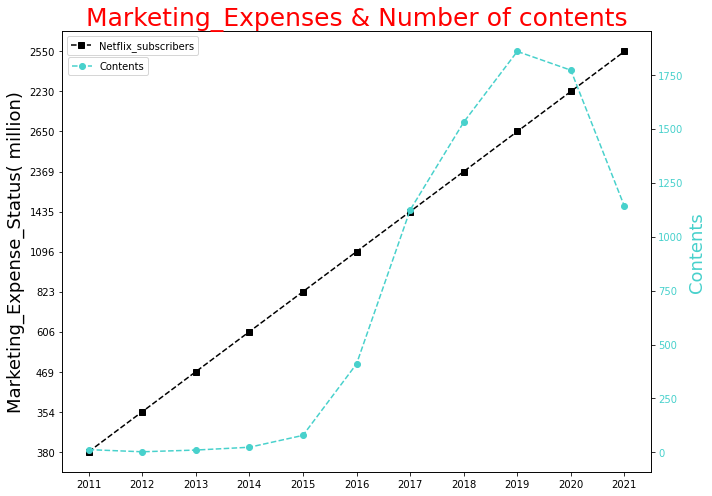

In [40]:
# 구독자수와 컨텐츠 개수의 상관 관계 
fig, ax1 = plt.subplots(figsize=(10,7)) 
ax1.set_ylabel('Marketing_Expense_Status( million)', fontsize=18, color='k')
ax1.plot(marketing.index, marketing.values, linestyle='--', color='k',label='Netflix_subscribers', marker='s') 
ax1.tick_params(axis='y',labelcolor='k')
ax1.legend(loc=0)


ax2=ax1.twinx()
ax2.set_ylabel('Contents', fontsize=18, color='mediumturquoise')
ax2.plot(Add_year.index, Add_year.values, marker='o',linestyle='--', color='mediumturquoise',label='Contents') 
ax2.set_title('Marketing_Expenses & Number of contents', fontsize=25 ,color='r',) 
ax2.tick_params(axis='y',labelcolor='mediumturquoise')
ax2.legend(loc=(0.01,0.9))         
         
         
fig.tight_layout()
#plt.show()
plt.savefig('6.Marketing_Expenses & Number of contents.png')

## <span style='background-color: #ffdce0'>정리</span>
1. 마케팅 비용이 증가하면 가입자수가 증가한다. 
2. 마케팅 비용의 증가는 공개된 작품수에 영향을 미칠수 있으나 일치하지는 않는다. 
3. 가입자 수의 증가는 공개된 작품수에 영향을 미칠수 있으나 일치하지는 않는다.

----

## 3. <span style='background-color: #f5f0ff'>가설2</span>
- 추가되는 컨텐츠 수가 많아질수록 사람들의 관심이 높아질 것이고 그에 따라 넷플릭스 주가도 올라갈 거라고 예상한다

### 3-1. 년도/ 월별 추가된 작품 수 추이

In [41]:
data["year_added"].value_counts()

2019    1858
2020    1771
2018    1530
2021    1140
2017    1123
2016     410
2015      79
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

### <span style='background-color: #fff5b1'>년도별 추가된 작품 수</span> 

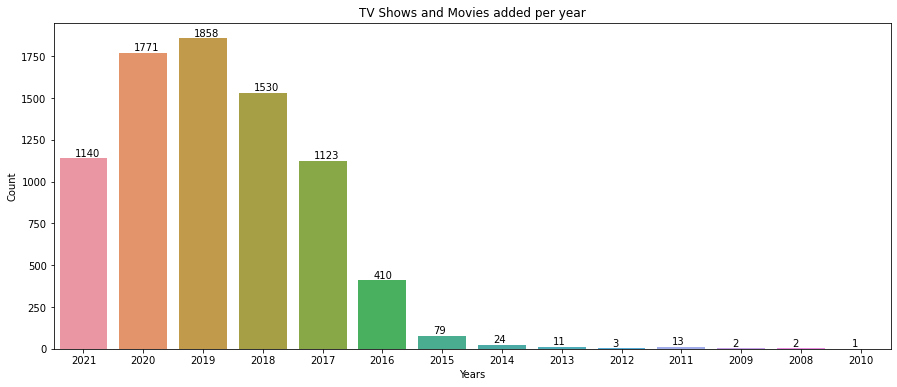

In [42]:
plt.figure(figsize=(15, 6))
plt.title("TV Shows and Movies added per year")
ax = sns.countplot(x='year_added', data=data)
plt.xlabel("Years")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), 
    va = 'bottom', color = 'black')
    
plt.savefig('TV Shows and Movies added per year.png')

In [43]:
data["month_added"].value_counts()

December     759
July         708
January      701
October      701
April        694
March        686
November     671
August       667
September    661
June         633
May          545
February     541
Name: month_added, dtype: int64

### <span style='background-color: #fff5b1'>월별 추가된 작품 수</span>  

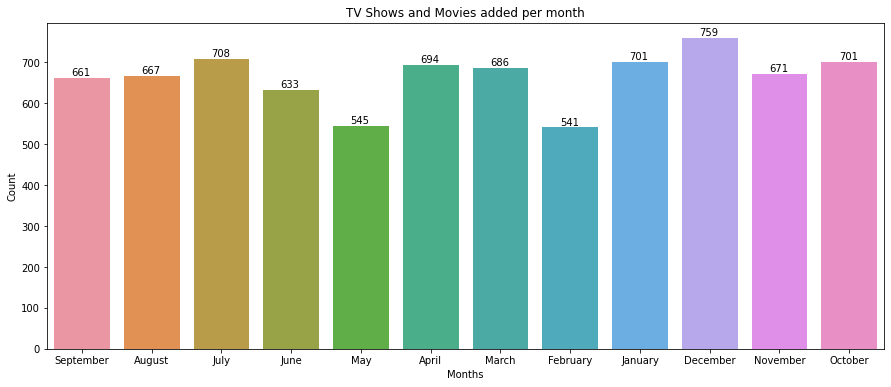

In [44]:
plt.figure(figsize=(15, 6))
plt.title("TV Shows and Movies added per month")
ax = sns.countplot(x='month_added', data=data)
plt.xlabel("Months")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), 
    va = 'bottom', color = 'black')


### 3-2. 주식과 관계가 있을까?

#### 넷플릭스 주식 데이터

In [45]:
filepath = os.getenv("HOME") + '/aiffel/[hackathon]/NFLX.csv'
df = pd.read_csv(filepath, index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,7.931429,9.224286,6.931429,8.892857,8.892857,324109100
2010-02-01,8.830000,9.614286,8.468571,9.435714,9.435714,214988200
2010-03-01,9.431429,10.807143,9.374286,10.534286,10.534286,190620500
2010-04-01,10.517143,15.671429,10.517143,14.128571,14.128571,482079500
2010-05-01,14.280000,17.071428,12.857143,15.878571,15.878571,533838900


#### 종가만 사용

In [46]:
stock = df['Close']
stock.head(20)

Date
2010-01-01     8.892857
2010-02-01     9.435714
2010-03-01    10.534286
2010-04-01    14.128571
2010-05-01    15.878571
2010-06-01    15.521429
2010-07-01    14.650000
2010-08-01    17.931429
2010-09-01    23.165714
2010-10-01    24.795713
2010-11-01    29.414286
2010-12-01    25.100000
2011-01-01    30.582857
2011-02-01    29.524286
2011-03-01    33.968571
2011-04-01    33.238571
2011-05-01    38.685715
2011-06-01    37.527142
2011-07-01    37.998569
2011-08-01    33.572857
Name: Close, dtype: float64

In [47]:
# 데이터프레임으로 변환
stock_df = stock.to_frame()
stock_df

# 결측치 확인
stock_df.isnull().sum()

Close    0
dtype: int64

In [48]:
# 날짜 컬럼 추가
date = stock_df.index
stock_df['date'] = date

stock_df

,Close,date
Date,,
2010-01-01,8.892857,2010-01-01
2010-02-01,9.435714,2010-02-01
2010-03-01,10.534286,2010-03-01
2010-04-01,14.128571,2010-04-01
2010-05-01,15.878571,2010-05-01
...,...,...
2021-08-01,569.190002,2021-08-01
2021-09-01,610.340027,2021-09-01
2021-10-01,690.309998,2021-10-01


In [49]:
stock_df.reset_index(drop=True, inplace = True)
stock_df

,Close,date
0,8.892857,2010-01-01
1,9.435714,2010-02-01
2,10.534286,2010-03-01
3,14.128571,2010-04-01
4,15.878571,2010-05-01
...,...,...
139,569.190002,2021-08-01
140,610.340027,2021-09-01
141,690.309998,2021-10-01
142,641.900024,2021-11-01


#### 년도만 분리

In [50]:
stock_df['year'] = stock_df["date"].apply(lambda x : str(x).split("-")[0])
stock_df

,Close,date,year
0,8.892857,2010-01-01,2010
1,9.435714,2010-02-01,2010
2,10.534286,2010-03-01,2010
3,14.128571,2010-04-01,2010
4,15.878571,2010-05-01,2010
...,...,...,...
139,569.190002,2021-08-01,2021
140,610.340027,2021-09-01,2021
141,690.309998,2021-10-01,2021
142,641.900024,2021-11-01,2021


In [51]:
# year로 groupby한뒤 종가의 평균을 내주었다

mean = stock_df.groupby('year')['Close'].mean()
mean

year
2010     17.454048
2011     26.843571
2012     11.697500
2013     36.786428
2014     57.380595
2015     94.306309
2016    102.040001
2017    167.418336
2018    320.612501
2019    328.775002
2020    450.823334
2021    564.095001
Name: Close, dtype: float64

### 주식 그래프

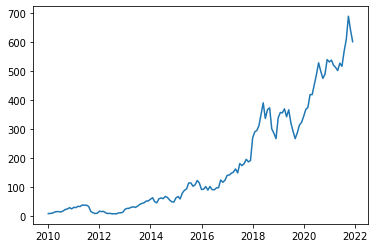

In [52]:
plt.plot(stock)

### <span style='background-color: #fff5b1'>주식과 컨텐츠 추가 개수 관계</span>   

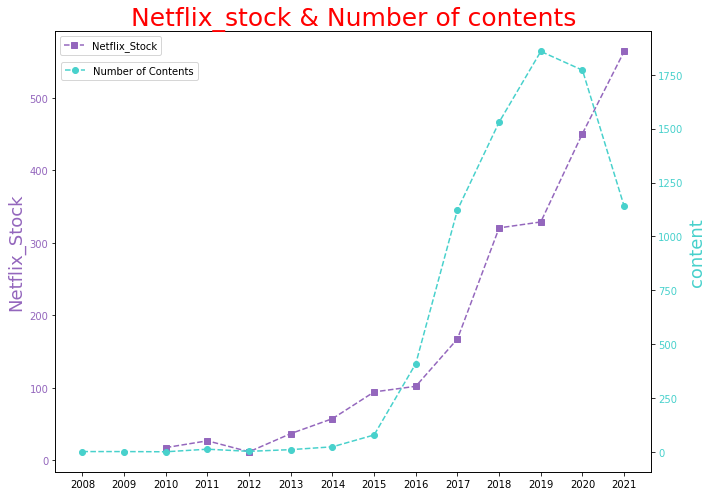

In [53]:
# 컨텐츠 추가 수와 주식과의 관계
fig, ax1 = plt.subplots(figsize=(10,7)) 
ax1.set_ylabel('Netflix_Stock', fontsize=18, color='C4')
ax1.plot(mean.index, mean.values, linestyle='--', color='C4',label='Netflix_Stock', marker='s') 
ax1.tick_params(axis='y',labelcolor='C4')
ax1.legend(loc=0)


ax2=ax1.twinx()
ax2.set_ylabel('content', fontsize=18, color='mediumturquoise')
ax2.plot(data['year_added'].value_counts().sort_index().index, data['year_added'].value_counts().sort_index().values, marker='o',linestyle='--', color='mediumturquoise',label='Number of Contents') 
ax2.set_title('Netflix_stock & Number of contents', fontsize=25 ,color='r',) 
ax2.tick_params(axis='y',labelcolor='mediumturquoise')
ax2.legend(loc=(0.01,0.89))  
         
         
fig.tight_layout()
plt.show()

## <span style='background-color: #ffdce0'>정리</span>
- 그래프를 보면 추가된 컨텐츠 수가 증가할 수록 2019년까지 주가도 상승하는 걸 볼 수 있다. 
- 그렇지만 2020-2021년에 컨텐츠 수가 줄었음에도 주가는 상승하는걸 볼 수 있는데 예상을 해보자면 2020년도에는 에밀리,파리에 가다, 스위트홈 등 2021년도에는 특히 오징어게임이 흥행에 성공해서 주가가 오른것같다.
- 이로써 등록된 컨텐츠 수와 주가와의 상관관계는 불분명하다. 
- 주가상승에는 컨텐츠 수외에도 다양한 요인이 영향을 끼치기 때문에 두개의 데이터를 가지고 판단하는 것은 무리라고 판단했다.